<a href="https://colab.research.google.com/github/Art9521/Art9521/blob/main/8_4_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для выполнения задачи будет использован csv файл “vgsale_1”, содержащий данные о видеоиграх, выпущенных с 1980 по 2020 гг. Каждое из наблюдений в файле имеет 10 характеристик:

Name – название игры,
Platform – игровая платформа (PC, PSP, X360 и др.),
Year – год выпуска игры,
Genre – жанр игры,
Publisher – издатель игры,
NA_Sales – продажи в Северной Америке (в миллионах),
EU_Sales – продажи в Европе (в миллионах),
JP_Sales – продажи в Японии (в миллионах),
Other_Sales – продажи в остальных странах мира (в миллионах),
Global_Sales – объем продаж по всему миру.
Загрузите файл «vgsales_1.csv» в объект DataFrame, рассчитайте необходимые показатели и визуализируйте информацию, используя функции любой библиотеки для визуализации данных. Задание:

Ответь на вопрос: игры каких жанров были наиболее популярны до 2000 года, а какие после?
Оцени популярность жанров по количеству выпущенных игр и по объему продаж по всему миру. Для визуализации полученных результатов используй столбчатые диаграммы.
Примечание. Одна и та же игра может встречаться в выборке несколько раз, т.к. она может быть выпущена на нескольких платформах.

Отобрази на графике общее число видеоигр, выпущенных в каждом году.
Определи трех издателей, выпустивших наибольшее количество видеоигр. Изобрази количество выпущенных издателями видеоигр для каждой платформы на столбчатой диаграмме (можно использовать диаграмму с накоплением).
Отобрази на круговых диаграммах доли суммарного объема продаж с 1980 г. до 2000 г. и с 2000 г. до 2020 г. в Северной Америке, Европе, Японии (также для построения корректных диаграмм используйте столбец “Other Sales”) от объема продаж по всему миру.

In [1]:
!pip install gdown

In [24]:
import csv
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Скачивание файла с Google Drive
file_id = '1XV9IZ8cGArgCO9VkGId_IW2fewhg_tLN'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'vgsale_1.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1XV9IZ8cGArgCO9VkGId_IW2fewhg_tLN
To: /content/vgsale_1.csv
100%|██████████| 1.37M/1.37M [00:00<00:00, 58.2MB/s]


'vgsale_1.csv'

In [11]:
# Проверка содержимого файла
with open(output, 'r') as file:
    lines = file.readlines()
    for line in lines[:10]:  # вывод первых 10 строк
        print(line)

Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,Human Development Index,Mean years of schooling,Gross National Income,Population

1,Japan,106.48,Asia,0.99,29,0.925,13.4,42274.0,123294513

2,Taiwan,106.47,Asia,0.96,4,,,,10143543

3,Singapore,105.89,Asia,0.97,0,0.939,11.9,90919.0,6014723

4,Hong Kong,105.37,Asia,0.94,1,0.952,12.2,62607.0,7491609

5,China,104.1,Asia,0.96,8,0.768,7.6,17504.0,1425671352

6,South Korea,102.35,Asia,0.98,0,0.925,12.5,44501.0,51784059

7,Belarus,101.6,Europe,1.0,2,0.808,12.1,18849.0,9498238

8,Finland,101.2,Europe,1.0,5,0.94,12.9,49452.0,5545475

"9,Liechtenstein,101.07,Europe,1.0,0,0.935,12.5,146830.0,	39315"



In [4]:
df = pd.read_csv(output)

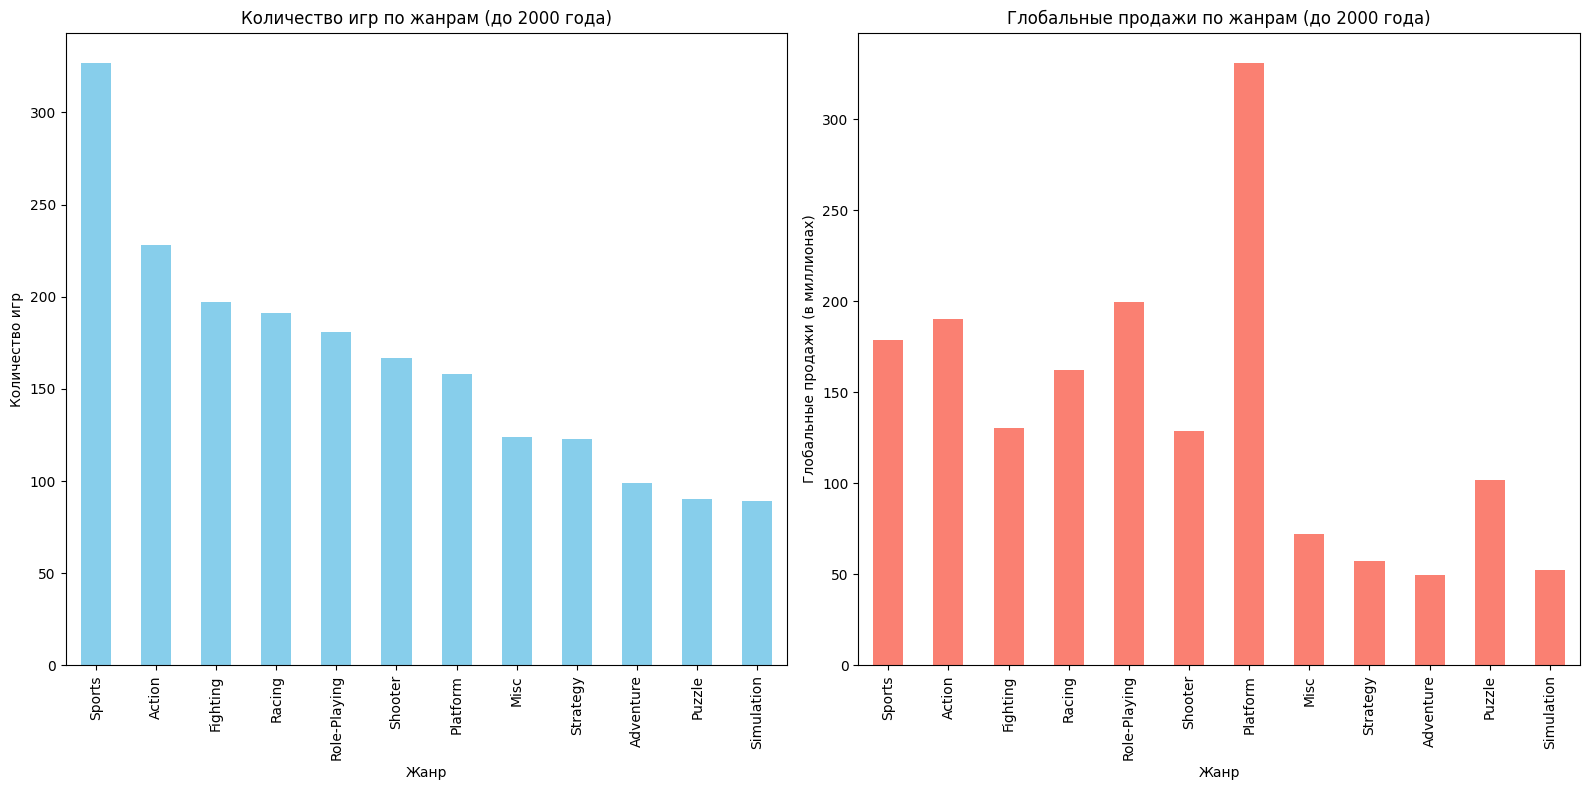

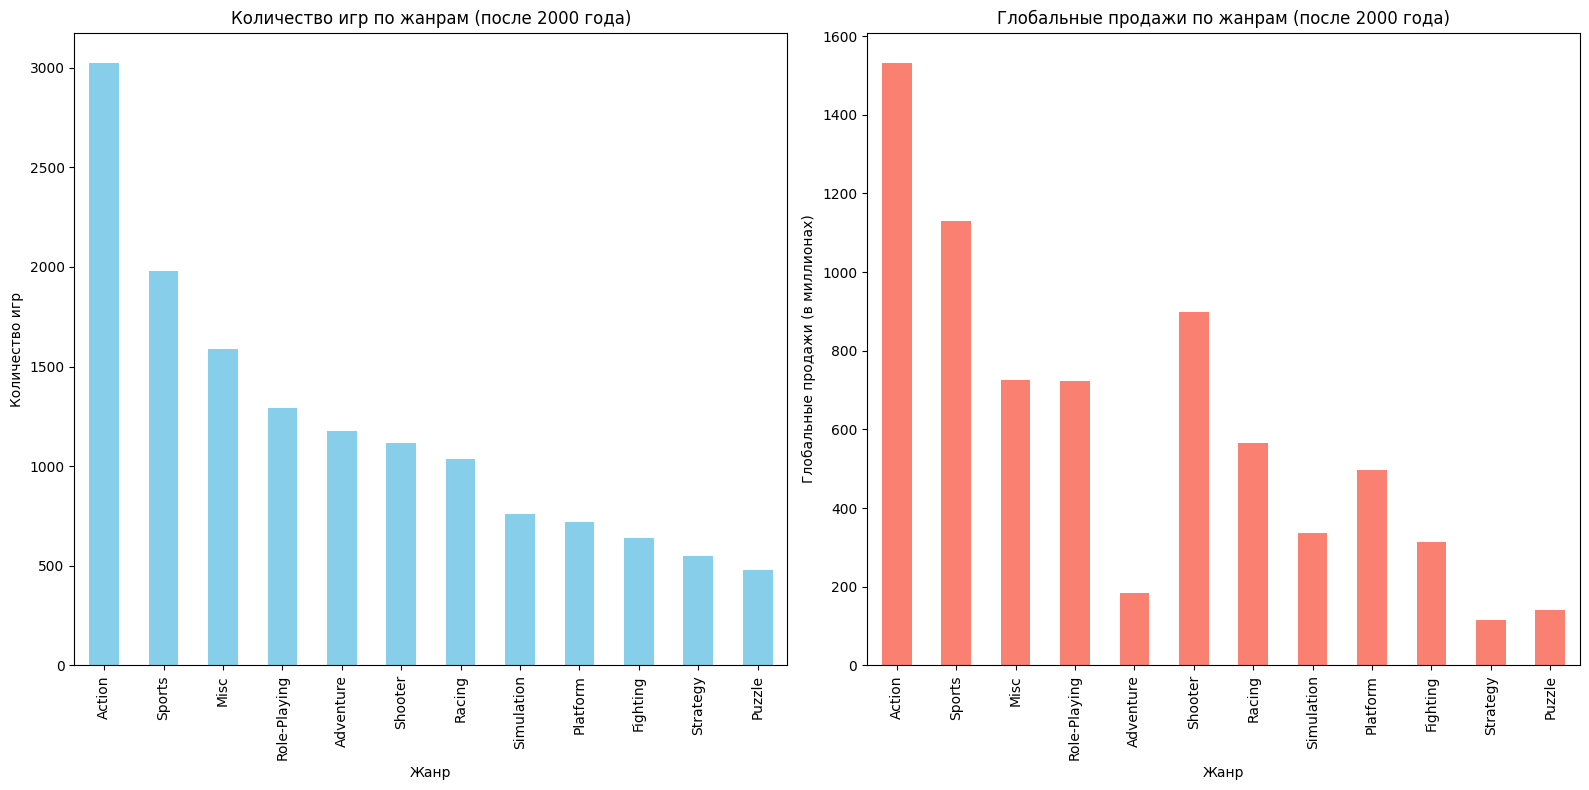

Популярные жанры до 2000 года:
              Game_Count  Global_Sales
Genre                                 
Sports               327        178.85
Action               228        190.47
Fighting             197        130.69
Racing               191        162.50
Role-Playing         181        199.77
Shooter              167        128.74
Platform             158        331.18
Misc                 124         71.99
Strategy             123         57.43
Adventure             99         49.59
Puzzle                90        101.72
Simulation            89         52.56

Популярные жанры после 2000 года:
              Game_Count  Global_Sales
Genre                                 
Action              3025       1532.41
Sports              1977       1130.39
Misc                1586        725.63
Role-Playing        1290        724.07
Adventure           1177        185.21
Shooter             1115        897.46
Racing              1035        564.27
Simulation           762        337.6

In [5]:
# Разделение данных на два периода: до 2000 года и с 2000 года
df_before_2000 = df[df['Year'] < 2000]
df_after_2000 = df[df['Year'] >= 2000]

# Подсчет популярности жанров
popularity_before_2000 = df_before_2000.groupby('Genre').agg({
    'Name': 'count',
    'Global_Sales': 'sum'
}).rename(columns={'Name': 'Game_Count'})

popularity_after_2000 = df_after_2000.groupby('Genre').agg({
    'Name': 'count',
    'Global_Sales': 'sum'
}).rename(columns={'Name': 'Game_Count'})

# Сортировка данных для визуализации
popularity_before_2000 = popularity_before_2000.sort_values(by='Game_Count', ascending=False)
popularity_after_2000 = popularity_after_2000.sort_values(by='Game_Count', ascending=False)

# Визуализация популярности жанров до 2000 года
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# График количества игр
popularity_before_2000['Game_Count'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Количество игр по жанрам (до 2000 года)')
axes[0].set_xlabel('Жанр')
axes[0].set_ylabel('Количество игр')

# График глобальных продаж
popularity_before_2000['Global_Sales'].plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Глобальные продажи по жанрам (до 2000 года)')
axes[1].set_xlabel('Жанр')
axes[1].set_ylabel('Глобальные продажи (в миллионах)')

plt.tight_layout()
plt.show()

# Визуализация популярности жанров после 2000 года
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# График количества игр
popularity_after_2000['Game_Count'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Количество игр по жанрам (после 2000 года)')
axes[0].set_xlabel('Жанр')
axes[0].set_ylabel('Количество игр')

# График глобальных продаж
popularity_after_2000['Global_Sales'].plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Глобальные продажи по жанрам (после 2000 года)')
axes[1].set_xlabel('Жанр')
axes[1].set_ylabel('Глобальные продажи (в миллионах)')

plt.tight_layout()
plt.show()

# Вывод результатов
print("Популярные жанры до 2000 года:")
print(popularity_before_2000)
print("\nПопулярные жанры после 2000 года:")
print(popularity_after_2000)

Для выполнения работы будет использован csv файл “IQ_countries”, содержащий данные о среднем значении IQ по странам мира. Каждое из наблюдений в файле имеет следующие характеристики:

Rank – место в рейтинге
Country – название страны
Average IQ – средний показатель IQ
Continent – название континента
Literacy Rate – коэффициент грамотности
Nobel Prices – количество нобелевских премий
Human Development Index – индекс человеческого развития
Mean years of schooling – среднее количество лет школы
Gross National Income – показатель “валовой национальный доход”
Population – численность населения.
Задание: проведи разведочный анализ данных, выяви необычные взаимосвязи между значениями столбцов таблицы, выполни визуализацию, сделай выводы.

In [34]:
# Скачивание файла с Google Drive
file_id = '1d3kt9flMqa7SLzVHXZ6zYIS-OEFrK8TF'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'IQ_countries.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1d3kt9flMqa7SLzVHXZ6zYIS-OEFrK8TF
To: /content/IQ_countries.csv
100%|██████████| 11.9k/11.9k [00:00<00:00, 24.0MB/s]


'IQ_countries.csv'

In [75]:
# Предварительная обработка данных для исправления форматирования
cleaned_lines = []
with open(output, 'r') as file:
    reader = csv.reader(file, delimiter=',')
    headers = next(reader)
    cleaned_lines.append(','.join(headers) + '\n')

    for row in reader:
        cleaned_row = [field.replace('"', '') for field in row]  # Убираем кавычки
        if len(cleaned_row) == len(headers):
            cleaned_lines.append(','.join(cleaned_row) + '\n')
        else:
            # Попытка исправить строки с некорректным количеством полей
            fixed_row = row[0].replace('"', '').split(',')
            if len(fixed_row) == len(headers):
                cleaned_lines.append(','.join(fixed_row) + '\n')

# Запись очищенных данных во временный файл
cleaned_output = 'cleaned_IQ_countries.csv'
with open(cleaned_output, 'w') as cleaned_file:
    cleaned_file.writelines(cleaned_lines)


In [76]:
# Загрузка очищенного файла в DataFrame
df = pd.read_csv(cleaned_output)

# Вывод заголовков столбцов для проверки
print("Заголовки столбцов:")
print(df.columns)

# Вывод первых нескольких строк для проверки данных
print("\nПервые несколько строк данных:")
print(df.head())

Заголовки столбцов:
Index(['Rank', 'Country', 'Average IQ', 'Continent', 'Literacy Rate',
       'Nobel Prices', 'Human Development Index', 'Mean years of schooling',
       'Gross National Income', 'Population'],
      dtype='object')

Первые несколько строк данных:
   Rank    Country  Average IQ Continent  Literacy Rate  Nobel Prices  \
0     1      Japan      106.48      Asia           0.99            29   
1     2     Taiwan      106.47      Asia           0.96             4   
2     3  Singapore      105.89      Asia           0.97             0   
3     4  Hong Kong      105.37      Asia           0.94             1   
4     5      China      104.10      Asia           0.96             8   

   Human Development Index  Mean years of schooling  Gross National Income  \
0                    0.925                     13.4                42274.0   
1                      NaN                      NaN                    NaN   
2                    0.939                     11.9        

In [77]:
# Проверим, какие столбцы содержат ошибки
for column in df.columns:
    print(f"Проверка столбца: {column}")
    try:
        df[column] = df[column].astype(float)
        print(f"Столбец {column} успешно преобразован в float")
    except ValueError as e:
        print(f"Ошибка преобразования в столбце {column}: {e}")


Проверка столбца: Rank
Столбец Rank успешно преобразован в float
Проверка столбца: Country
Ошибка преобразования в столбце Country: could not convert string to float: 'Japan'
Проверка столбца: Average IQ
Столбец Average IQ успешно преобразован в float
Проверка столбца: Continent
Ошибка преобразования в столбце Continent: could not convert string to float: 'Asia'
Проверка столбца: Literacy Rate
Столбец Literacy Rate успешно преобразован в float
Проверка столбца: Nobel Prices
Столбец Nobel Prices успешно преобразован в float
Проверка столбца: Human Development Index
Столбец Human Development Index успешно преобразован в float
Проверка столбца: Mean years of schooling
Столбец Mean years of schooling успешно преобразован в float
Проверка столбца: Gross National Income
Столбец Gross National Income успешно преобразован в float
Проверка столбца: Population
Столбец Population успешно преобразован в float


In [80]:
# Преобразование числовых столбцов в нужные типы данных
def convert_to_float(x):
    try:
        return float(x.replace(',', '').replace('\t', '')) if isinstance(x, str) else float(x)
    except ValueError:
        return None

def convert_to_int(x):
    try:
        return int(float(x.replace(',', '').replace('\t', ''))) if isinstance(x, str) else int(float(x))
    except ValueError:
        return None

# Преобразование только числовых столбцов
numerical_columns = ['Rank', 'Average IQ', 'Literacy Rate', 'Nobel Prices', 'Human Development Index', 'Mean years of schooling', 'Gross National Income', 'Population']

for column in numerical_columns:
    if column in df.columns:
        df[column] = df[column].apply(convert_to_float if 'IQ' in column or 'Rate' in column or 'Index' in column or 'Income' in column or 'years' in column else convert_to_int)

# Проверка основной информации о данных
print(df.info())

# Статистическое описание данных
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     193 non-null    int64  
 1   Country                  193 non-null    object 
 2   Average IQ               193 non-null    float64
 3   Continent                193 non-null    object 
 4   Literacy Rate            193 non-null    float64
 5   Nobel Prices             193 non-null    int64  
 6   Human Development Index  179 non-null    float64
 7   Mean years of schooling  179 non-null    float64
 8   Gross National Income    179 non-null    float64
 9   Population               193 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 15.2+ KB
None
             Rank  Average IQ  Literacy Rate  Nobel Prices  \
count  193.000000  193.000000     193.000000    193.000000   
mean    97.000000   82.047927       0.864249      5.922

                             Rank  Average IQ  Literacy Rate  Nobel Prices  \
Rank                     1.000000   -0.975553      -0.624732     -0.220633   
Average IQ              -0.975553    1.000000       0.634726      0.205644   
Literacy Rate           -0.624732    0.634726       1.000000      0.119069   
Nobel Prices            -0.220633    0.205644       0.119069      1.000000   
Human Development Index -0.777376    0.755459       0.815929      0.230896   
Mean years of schooling -0.727461    0.705443       0.831993      0.233933   
Gross National Income   -0.661285    0.634854       0.501705      0.269284   
Population              -0.043974    0.067072      -0.043248      0.166861   

                         Human Development Index  Mean years of schooling  \
Rank                                   -0.777376                -0.727461   
Average IQ                              0.755459                 0.705443   
Literacy Rate                           0.815929                 0

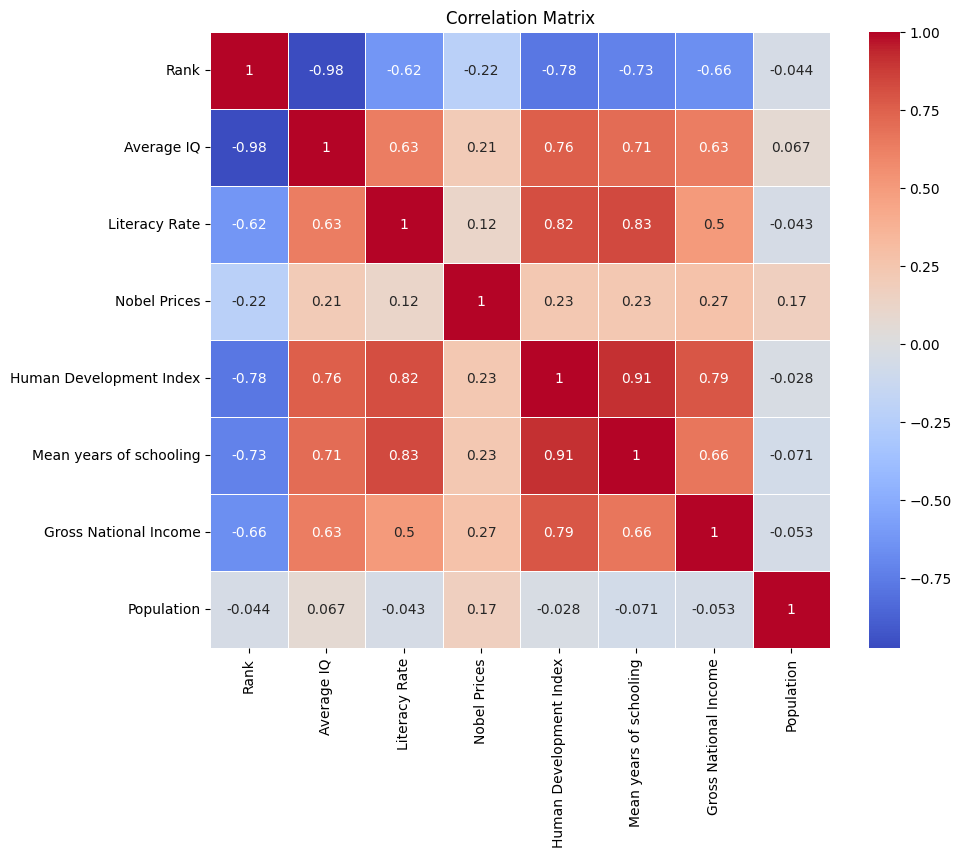

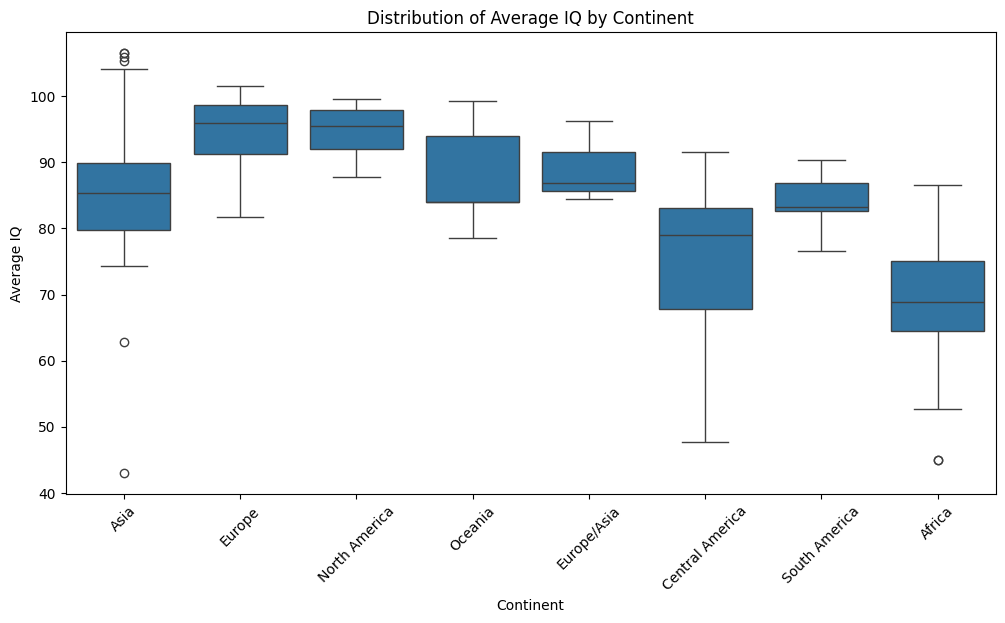

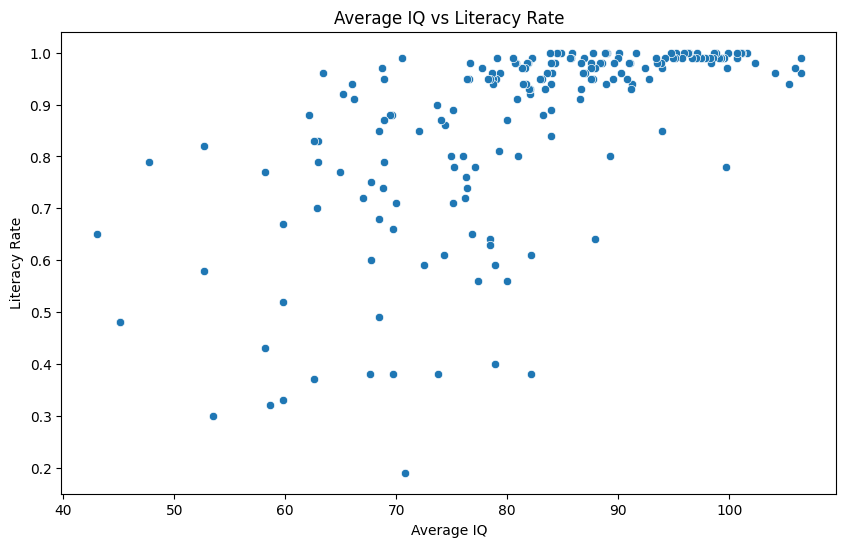

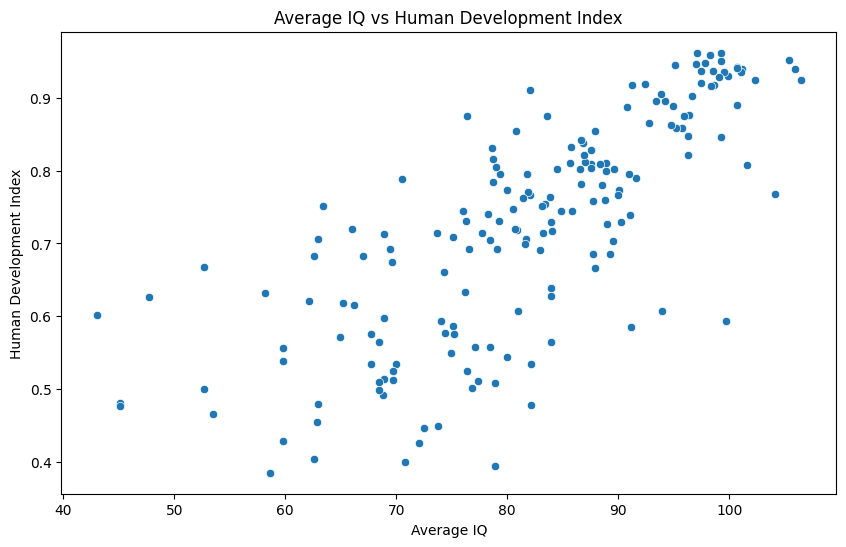

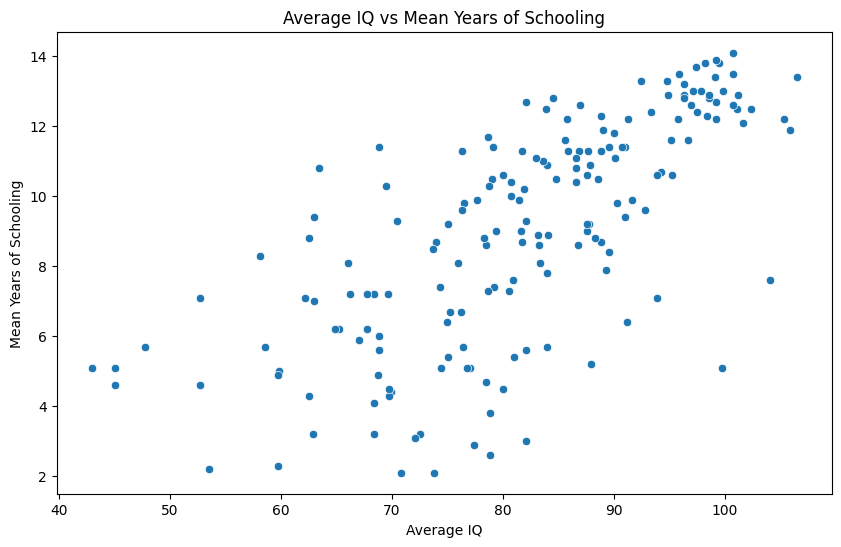

In [81]:
# Фильтрация только числовых данных для корреляционной матрицы
df_numeric = df[numerical_columns]

# Корреляционная матрица
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Визуализация распределения IQ по континентам
plt.figure(figsize=(12, 6))
sns.boxplot(x='Continent', y='Average IQ', data=df)
plt.title('Distribution of Average IQ by Continent')
plt.xticks(rotation=45)
plt.show()

# Взаимосвязь между средним IQ и коэффициентом грамотности
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average IQ', y='Literacy Rate', data=df)
plt.title('Average IQ vs Literacy Rate')
plt.xlabel('Average IQ')
plt.ylabel('Literacy Rate')
plt.show()

# Взаимосвязь между средним IQ и индексом человеческого развития
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average IQ', y='Human Development Index', data=df)
plt.title('Average IQ vs Human Development Index')
plt.xlabel('Average IQ')
plt.ylabel('Human Development Index')
plt.show()

# Взаимосвязь между средним IQ и средним количеством лет обучения
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average IQ', y='Mean years of schooling', data=df)
plt.title('Average IQ vs Mean Years of Schooling')
plt.xlabel('Average IQ')
plt.ylabel('Mean Years of Schooling')
plt.show()


Из анализа данных можно сделать следующие выводы:

Средний IQ положительно коррелирует с показателями уровня жизни, образования и грамотности.

Страны с более высоким индексом человеческого развития и высоким уровнем грамотности имеют тенденцию к более высоким средним значениям IQ.

Более продолжительное обучение также связано с более высокими средними значениями IQ.

Корреляционная матрица показывает взаимосвязи между различными показателями, что может помочь в дальнейшем анализе и принятии решений.

Для выполнения работы будет использован csv файл “shopping_habits”, содержащий данные о различных покупках, которые совершаются покупателями в разных штатах США. Каждое из наблюдений в файле имеет следующие характеристики:

Customer ID – порядковый номер строки в таблице
Age – возраст покупателя
Gender – пол покупателя
Item Purchased – приобретенный товар
Category - категория
Purchase Amount (USD) – сумма покупки (в долларах)
Location – локация покупки
Size – размер (одежды)
Color – цвет
Season – время года совершения покупки
Review Rating – полученный в отзыве рейтинг
Subscription Status – статус подписки покупателя
Shipping Type – тип доставки
Discount Applied – применена ли скидка
Promo Code Used – применен ли промокод
Previous Purchases – были ли у данного покупателя предыдущие покупки
Payment Method – способ оплаты
Frequency of Purchases – частота покупок.
Задание: проведи разведочный анализ данных, выяви обычные взаимосвязи между значениями столбцов таблицы, выполни визуализацию, сделай выводы.

In [82]:
# Скачивание файла с Google Drive
file_id = '1Y7L6PQcr8_jblDWNqunh3XLG7YgUViT-'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'shopping_habits.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Y7L6PQcr8_jblDWNqunh3XLG7YgUViT-
To: /content/shopping_habits.csv
100%|██████████| 417k/417k [00:00<00:00, 11.1MB/s]


'shopping_habits.csv'

In [83]:
# Проверка содержимого файла
with open(output, 'r') as file:
    lines = file.readlines()
    for line in lines[:10]:  # вывод первых 10 строк
        print(line)

Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases

1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly

2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly

3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly

4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly

5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually

6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly

7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly

8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter

In [84]:
df = pd.read_csv(output)

In [85]:
# Основная информация о данных
df.info()

# Статистическое описание числовых данных
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [87]:
# Преобразование категорийных столбцов в числовые значения
from sklearn.preprocessing import LabelEncoder

# Создание экземпляра LabelEncoder
le = LabelEncoder()

# Применение LabelEncoder к категорийным столбцам
categorical_columns = ['Gender', 'Item Purchased', 'Category', 'Location', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases']
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Проверка преобразованных данных
print(df.head())
print(df.info())

   Customer ID  Age  Gender  Item Purchased  Category  Purchase Amount (USD)  \
0            1   55       1               2         1                   53.0   
1            2   19       1              23         1                   64.0   
2            3   50       1              11         1                   73.0   
3            4   21       1              14         2                   90.0   
4            5   45       1               2         1                   49.0   

   Location Size  Color  Season  Review Rating  Subscription Status  \
0        16    L      7       3            3.1                    1   
1        18    L     12       3            3.1                    1   
2        20    S     12       1            3.1                    1   
3        38    M     12       1            3.5                    1   
4        36    M     21       1            2.7                    1   

   Shipping Type  Discount Applied  Promo Code Used  Previous Purchases  \
0              1 

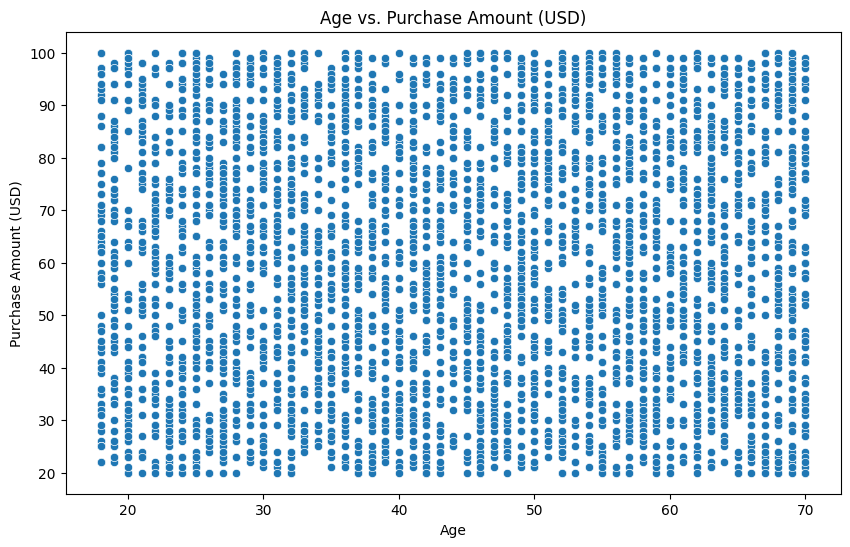

In [88]:
# Scatter plot: Возраст vs. Сумма покупок
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', data=df)
plt.title('Age vs. Purchase Amount (USD)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

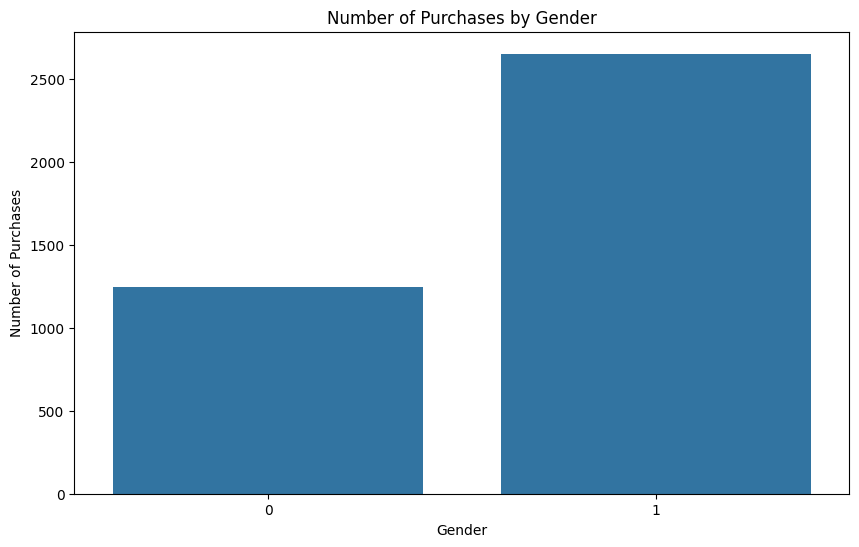

In [89]:
# Bar plot: Количество покупок по полу
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Number of Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.show()

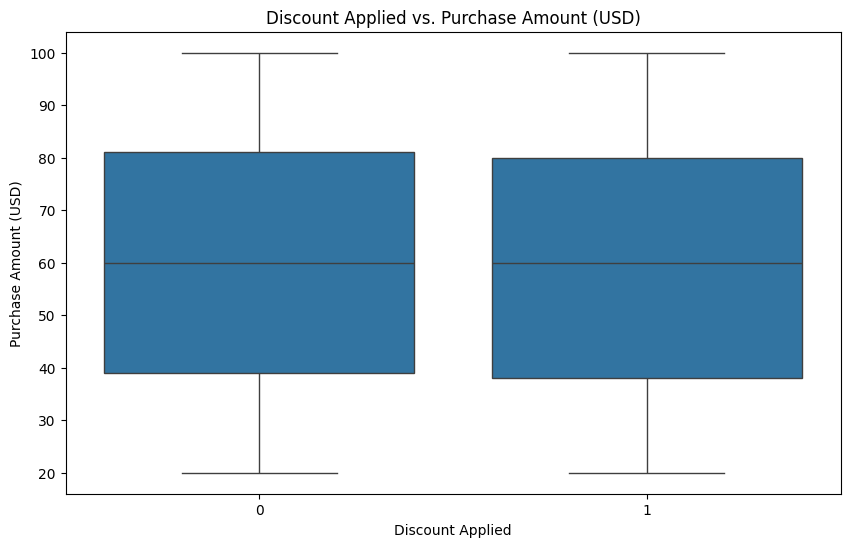

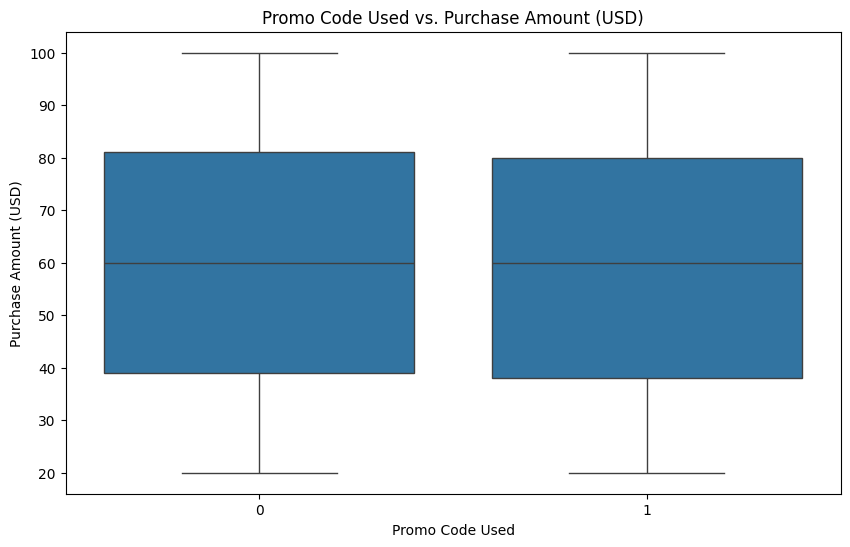

In [90]:
# Box plot: Скидки vs. Сумма покупок
plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount Applied', y='Purchase Amount (USD)', data=df)
plt.title('Discount Applied vs. Purchase Amount (USD)')
plt.xlabel('Discount Applied')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# Box plot: Промокоды vs. Сумма покупок
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo Code Used', y='Purchase Amount (USD)', data=df)
plt.title('Promo Code Used vs. Purchase Amount (USD)')
plt.xlabel('Promo Code Used')
plt.ylabel('Purchase Amount (USD)')
plt.show()

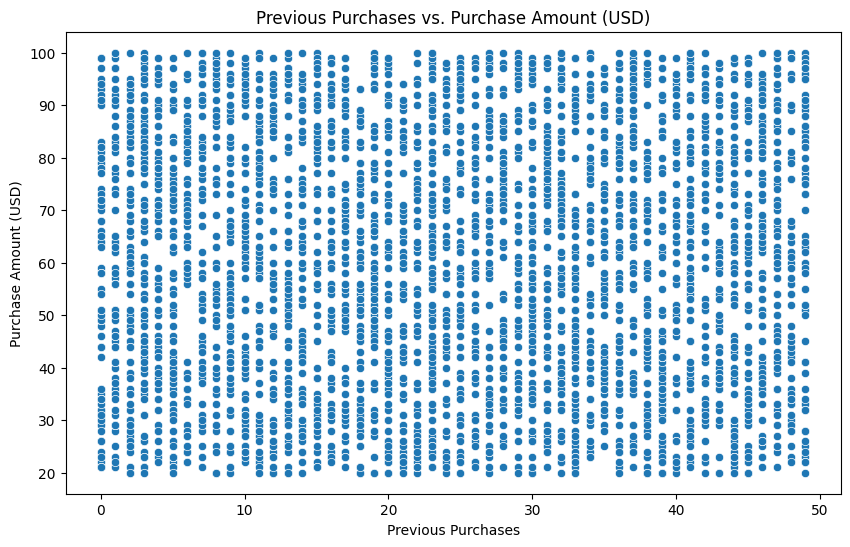

In [91]:
# Scatter plot: Количество предыдущих покупок vs. Сумма покупок
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Previous Purchases', y='Purchase Amount (USD)', data=df)
plt.title('Previous Purchases vs. Purchase Amount (USD)')
plt.xlabel('Previous Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.show()

1. Взаимосвязь между возрастом и суммой покупок
График: Возраст vs. Сумма покупок

Описание: Scatter plot показывает, как сумма покупок (в долларах) распределяется в зависимости от возраста покупателей.
Выводы:

Видно, что покупатели всех возрастов совершают покупки на различные суммы.
Однако, можно заметить, что суммы покупок у молодых покупателей (возраст до 30 лет) варьируются в большем диапазоне.

С возрастом разброс суммы покупок уменьшается, и старшие покупатели (возраст 50+) имеют тенденцию совершать покупки на более стабильные суммы.

2. Распределение покупок по полу

График: Количество покупок по полу

Описание:
Bar plot показывает количество покупок, совершенных мужчинами и женщинами.

Выводы:

Мужчины и женщины совершают покупки в примерно равных количествах.
Это указывает на то, что гендер не является значимым фактором, определяющим частоту покупок.

3. Влияние скидок и промокодов на сумму покупок

График: Скидки vs. Сумма покупок

Описание:
Box plot показывает распределение суммы покупок в зависимости от того, была ли применена скидка.

Выводы:
Видно, что при применении скидки (Discount Applied) сумма покупок значительно варьируется.

Покупатели, использующие скидки, совершают покупки на более высокие суммы, что может быть связано с стимулированием большего объема покупок при предоставлении скидок.

График: Промокоды vs. Сумма покупок

Описание: Box plot показывает распределение суммы покупок в зависимости от того, был ли применен промокод.

Выводы:
Покупки с применением промокода (Promo Code Used) также показывают более высокие суммы.

Это говорит о том, что промокоды также стимулируют покупателей совершать более крупные покупки.

4. Взаимосвязь между количеством предыдущих покупок и суммой покупок

График: Количество предыдущих покупок vs. Сумма покупок

Описание: Scatter plot показывает, как сумма текущих покупок зависит от количества предыдущих покупок.

Выводы:
Видно, что покупатели, которые уже совершали покупки ранее (Previous Purchases), имеют тенденцию совершать покупки на более высокие суммы.
Это может указывать на лояльность клиентов: те, кто покупает больше, вероятно, довольны своими предыдущими покупками и продолжают совершать покупки.

Заключение
На основании проведенного анализа данных и визуализаций можно сделать следующие выводы:

Возраст покупателей: Молодые покупатели имеют тенденцию к большему разбросу сумм покупок, тогда как старшие покупатели совершают более стабильные по сумме покупки.

Пол покупателей: Пол не является значимым фактором, влияющим на частоту покупок.
Скидки и промокоды: Применение скидок и промокодов стимулирует покупателей совершать более крупные покупки.

Лояльность клиентов: Покупатели, которые совершали предыдущие покупки, склонны к совершению покупок на более высокие суммы, что может свидетельствовать о лояльности клиентов.
